# **Importing Libraries**

In [64]:
# Importing all required libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pywt
import time

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

# **Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! ls 'drive/MyDrive/EDISS/UCI_HAR/'

activity_labels.txt  features.txt		  README.txt  test.csv	train.csv
features_info.txt    preprocessed_train_data.csv  test	      train


In [4]:
# mount the drive to get the dataset or else change the path
data_path = 'drive/MyDrive/EDISS/UCI_HAR/'

# Loading dataset
train_data = pd.read_csv(data_path + 'train.csv')
test_data = pd.read_csv(data_path + 'test.csv')

In [5]:
# Inspecting the Data
print("Train Data:")
print(train_data.head())
print(train_data.shape)


Train Data:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  

In [6]:
print("\nTest Data:")
print(test_data.head())
print(test_data.shape)


Test Data:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  

In [7]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
# Summary statistics
print(train_data.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


# **Data Preprocessing**

In [10]:
# Checking null data
train_data.isnull().sum().sort_values(ascending=False)

tBodyAcc-mean()-X            0
fBodyAccJerk-kurtosis()-Y    0
fBodyAccJerk-meanFreq()-X    0
fBodyAccJerk-meanFreq()-Y    0
fBodyAccJerk-meanFreq()-Z    0
                            ..
tBodyGyroJerk-iqr()-Z        0
tBodyGyroJerk-iqr()-Y        0
tBodyGyroJerk-iqr()-X        0
tBodyGyroJerk-energy()-Z     0
Activity                     0
Length: 563, dtype: int64

In [11]:
# Checking null data
test_data.isnull().sum().sort_values(ascending=False)

tBodyAcc-mean()-X            0
fBodyAccJerk-kurtosis()-Y    0
fBodyAccJerk-meanFreq()-X    0
fBodyAccJerk-meanFreq()-Y    0
fBodyAccJerk-meanFreq()-Z    0
                            ..
tBodyGyroJerk-iqr()-Z        0
tBodyGyroJerk-iqr()-Y        0
tBodyGyroJerk-iqr()-X        0
tBodyGyroJerk-energy()-Z     0
Activity                     0
Length: 563, dtype: int64

In [12]:
# Checking duplicate data
train_data.duplicated().sum()

0

In [13]:
# Checking duplicate data
test_data.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

In [14]:
# Activities distribution
activity_counts = train_data['Activity'].value_counts()
print(activity_counts)


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


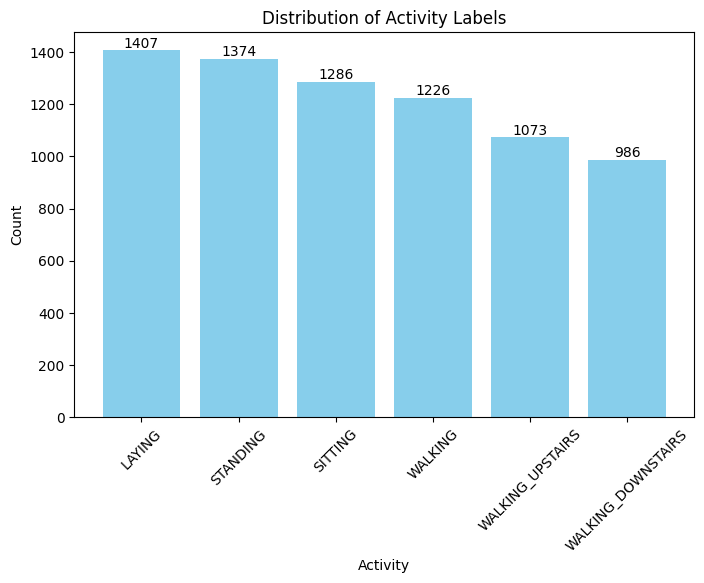

In [15]:
# Distribution of activity
activity_counts = train_data['Activity'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(activity_counts.index, activity_counts, color='skyblue')
plt.title('Distribution of Activity Labels')
plt.xlabel('Activity')
plt.ylabel('Count')

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

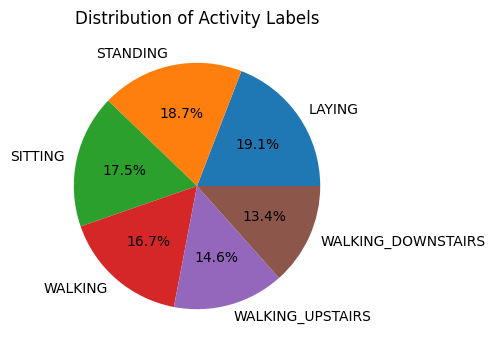

In [16]:
# Distribution of activity labels in pie-chart
plt.figure(figsize=(6, 4))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Distribution of Activity Labels')
plt.show()

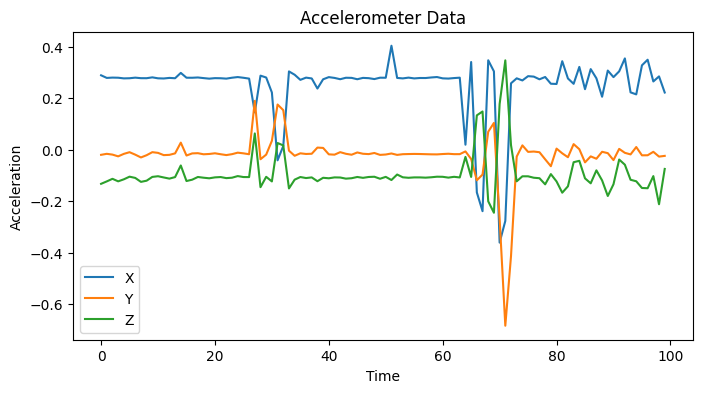

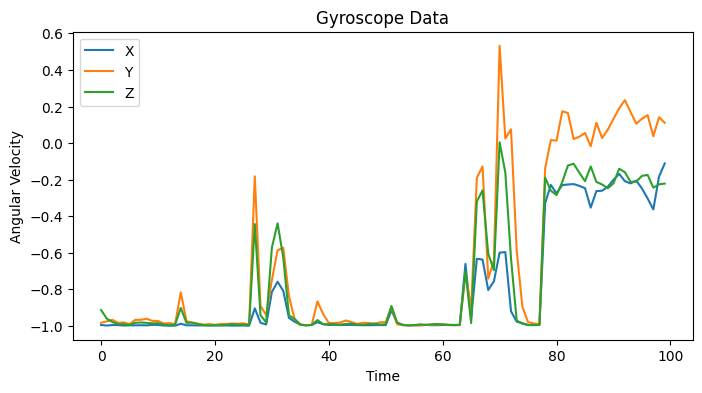

In [83]:
# Visualization of sensor data

# Select a sample of sensor data to visualize (e.g., the first 100 readings)
sample_data = train_data.iloc[:100]

# Extract accelerometer and gyroscope data
accelerometer_data = sample_data.iloc[:, :3]
gyroscope_data = sample_data.iloc[:, 3:6]

# Plot accelerometer data
plt.figure(figsize=(8, 4))
plt.plot(accelerometer_data, label=['X', 'Y', 'Z'])
plt.title('Accelerometer Data')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend(['X', 'Y', 'Z'])
plt.show()

# Plot gyroscope data
plt.figure(figsize=(8, 4))
plt.plot(gyroscope_data, label=['X', 'Y', 'Z'])
plt.title('Gyroscope Data')
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.legend(['X', 'Y', 'Z'])
plt.show()

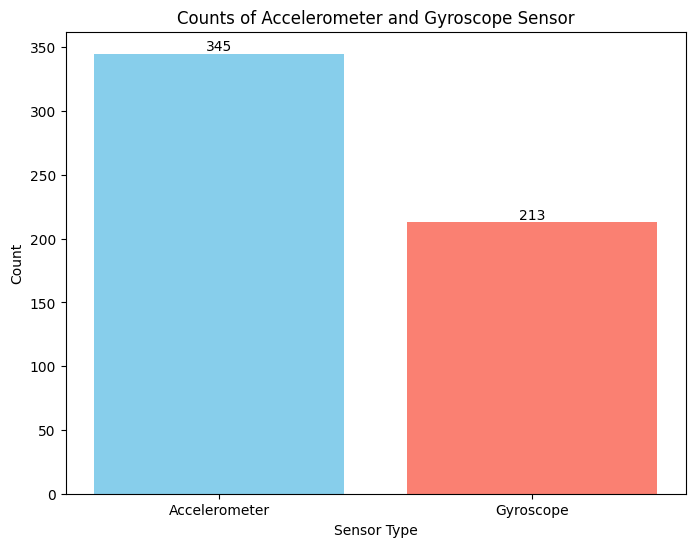

In [19]:
# Distribution of usage of accelerometer and gyroscope sensor signal
Acc_count = 0
Gyro_count = 0

# Iterate over column names
for column_name in train_data.columns:
    if 'Acc' in column_name:
        Acc_count += 1
    elif 'Gyro' in column_name:
        Gyro_count += 1

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Accelerometer', 'Gyroscope'], [Acc_count, Gyro_count], color=['skyblue', 'salmon'])
plt.title('Counts of Accelerometer and Gyroscope Sensor')
plt.xlabel('Sensor Type')
plt.ylabel('Count')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

In [20]:
data=pd.concat([train_data,test_data])
X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

# **K-Means**

In [21]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

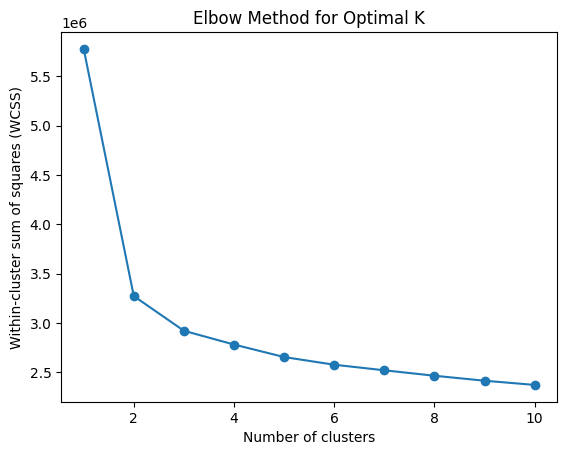

In [22]:
# Choosing the number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [23]:
# Based on the elbow method, choose the optimal number of clusters for K-Means
optimal_k = 2  # for example, based on the elbow method result

In [25]:
X.columns[234]

'tBodyAccJerkMag-entropy()'

In [27]:
X.columns[56]

'tGravityAcc-energy()-X'

Text(0, 0.5, 'tGravityAcc-energy()-X')

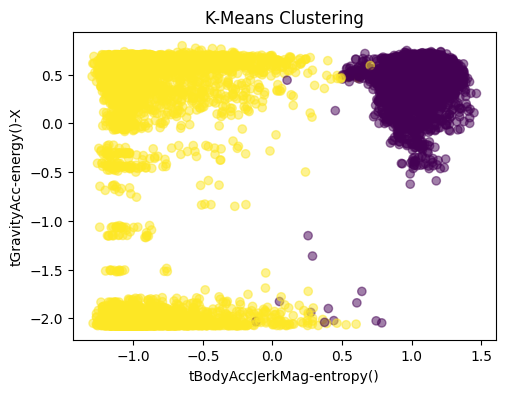

In [28]:
# Applying K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)

# Visualize K-means clustering results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 234], X_train_scaled[:, 56], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('tBodyAccJerkMag-entropy()')
plt.ylabel('tGravityAcc-energy()-X')


# **DBSCAN**

In [30]:
minpts = X.shape[1]
print(minpts)

561


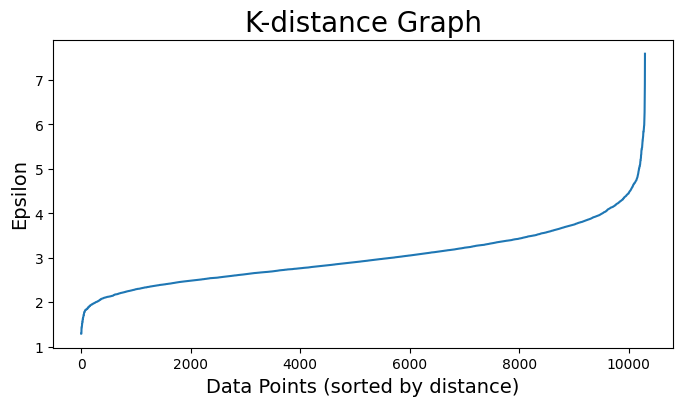

In [31]:
from sklearn.neighbors import NearestNeighbors

# Epsilon estimation
neighbors = NearestNeighbors(n_neighbors=minpts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

plt.figure(figsize=(8,4))
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points (sorted by distance)', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

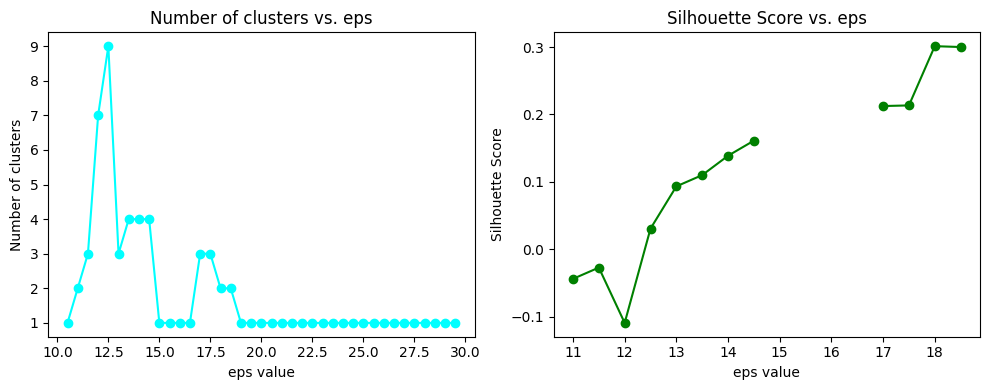

In [32]:

clusters = []
silhouette_scores = []
dbsacn_with_pca_metrics = {}
# Define the range for eps as a list of floats
eps_values = [float(i) for i in np.arange(10.5, 30.0,0.5)]

# Iterate over different values of eps

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=24)
    db_labels = dbscan.fit_predict(X_train_scaled)

    # Count the number of unique labels (excluding noise which is labeled as -1)
    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    clusters.append(n_clusters)

    # Calculate silhouette score only if there are at least two clusters (excluding noise)
    if n_clusters > 1:
        score = silhouette_score(X_train_scaled, db_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

# Plot the number of clusters and silhouette scores
plt.figure(figsize=(10, 4))

# Subplot for the number of clusters
plt.subplot(1, 2, 1)
plt.plot(eps_values, clusters, 'o-', color='cyan')
plt.title('Number of clusters vs. eps')
plt.xlabel('eps value')
plt.ylabel('Number of clusters')

# Subplot for silhouette scores
plt.subplot(1, 2, 2)
plt.plot(eps_values, silhouette_scores, 'o-', color='green')
plt.title('Silhouette Score vs. eps')
plt.xlabel('eps value')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



Number of clusters identified by DBSCAN: 3


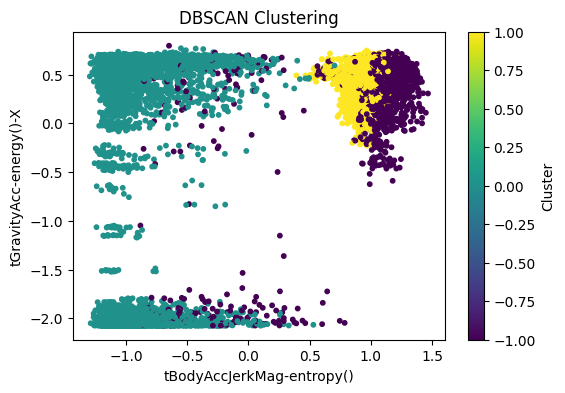

In [38]:
# Apply DBSCAN with optimized parameters
dbscan = DBSCAN(eps=17, min_samples=561)
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Display the number of clusters identified by DBSCAN
print("Number of clusters identified by DBSCAN:", len(np.unique(dbscan_labels)))

# Visualizing DBSCAN clustering
plt.figure(figsize=(6, 4))
plt.scatter(X_train_scaled[:, 234], X_train_scaled[:, 56], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('tBodyAccJerkMag-entropy()')
plt.ylabel('tGravityAcc-energy()-X')
plt.colorbar(label='Cluster')
plt.show()

# **PCA without reducing dimensionality to get full variance explanation**

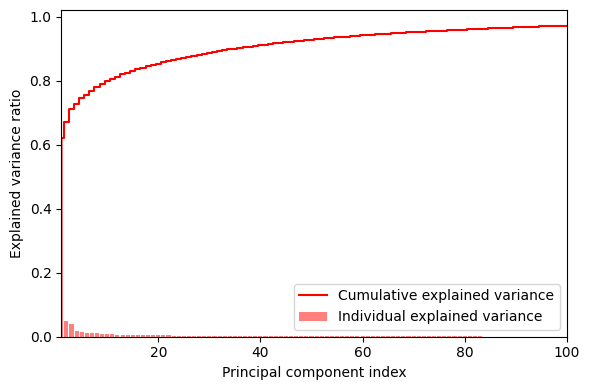


 
Optimal number of PCA components based on elbow method: 3


In [78]:

# Compute PCA without reducing dimensionality to get full variance explanation
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_

# Limit the number of components for the scree plot to the first 100
n_components_to_display = 100
explained_variance_limited = explained_variance[:n_components_to_display]

# Generate Scree plot for the first 100 components
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance_limited) + 1), explained_variance_limited, alpha=0.5, align='center', label='Individual explained variance', color='r')
plt.step(range(1, len(explained_variance_limited) + 1), np.cumsum(explained_variance_limited), where='mid', label='Cumulative explained variance', color='r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.xlim(1, n_components_to_display)  # Set the x-axis limits to show only the first 100 components
plt.tight_layout()
plt.show()

# Determine the elbow point, which is where the variance starts to level off
# This is subjective but typically you look for a 'knee' in the scree plot
# One method is to look for the point where the second derivative (the change in the change of variance explained) is greatest
second_derivative = np.diff(np.cumsum(explained_variance), 2)
elbow_point = np.argmin(second_derivative) + 2  # +2 because the second derivative reduces the length by 2
print(f"\n \nOptimal number of PCA components based on elbow method: {elbow_point}")


# **PCA for dimensionality reduction**

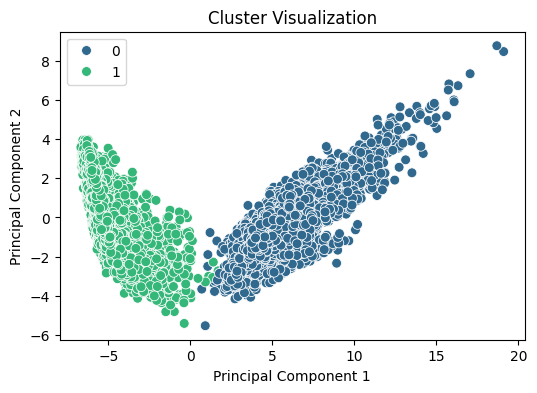

In [73]:
# PCA for dimensionality reduction visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PC1', y='PC2', data=principalDf, hue=kmeans_labels, palette='viridis', s=50)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# **K-Means after dimensionality reduction**

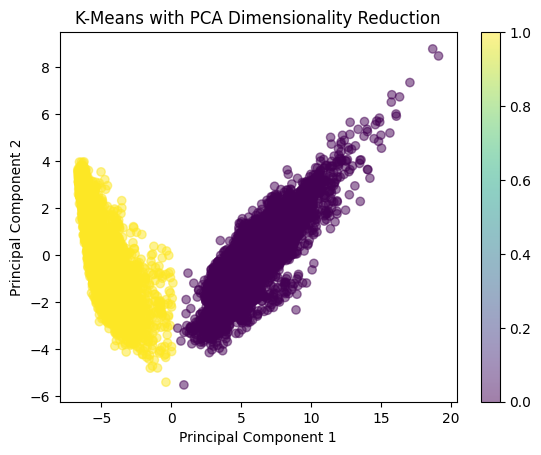

In [82]:
# K-Means with dimensionality reduction
kmeans_pca = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(principalDf)

# Plotting
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=kmeans_pca_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means with PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# **DBSCAN after dimensionality reduction**

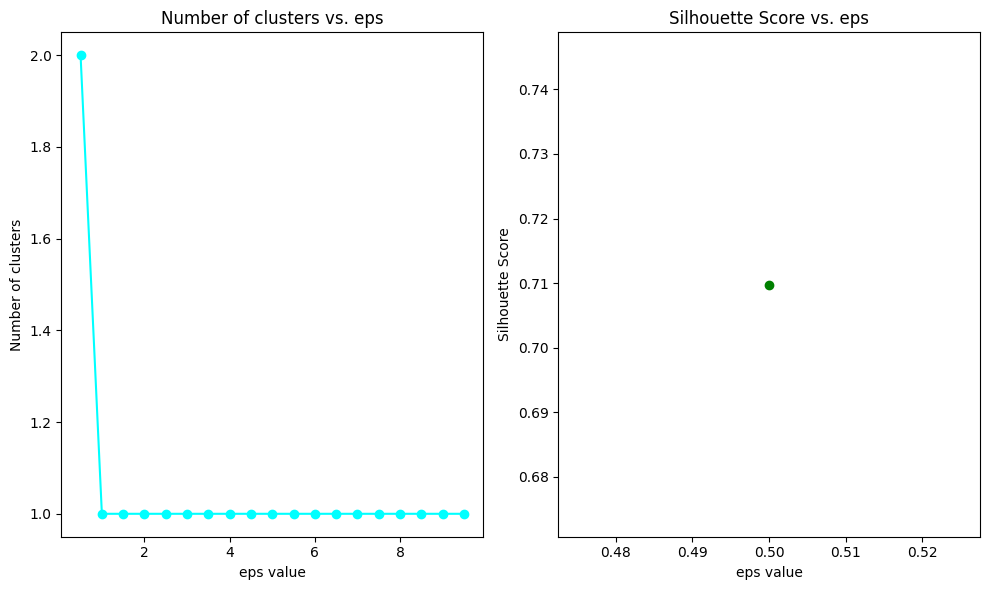

In [79]:

clusters = []
silhouette_scores = []
dbsacn_with_pca_metrics = {}
# Define the range for eps as a list of floats
eps_values = [float(i) for i in np.arange(0.5, 10.0,0.5)]

# Iterate over different values of eps

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    db_labels = dbscan.fit_predict(principalDf)

    # Count the number of unique labels (excluding noise which is labeled as -1)
    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    clusters.append(n_clusters)

    # Calculate silhouette score only if there are at least two clusters (excluding noise)
    if n_clusters > 1:
        score = silhouette_score(principalDf, db_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

# Plot the number of clusters and silhouette scores
plt.figure(figsize=(10, 6))

# Subplot for the number of clusters
plt.subplot(1, 2, 1)
plt.plot(eps_values, clusters, 'o-', color='cyan')
plt.title('Number of clusters vs. eps')
plt.xlabel('eps value')
plt.ylabel('Number of clusters')

# Subplot for silhouette scores
plt.subplot(1, 2, 2)
plt.plot(eps_values, silhouette_scores, 'o-', color='green')
plt.title('Silhouette Score vs. eps')
plt.xlabel('eps value')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



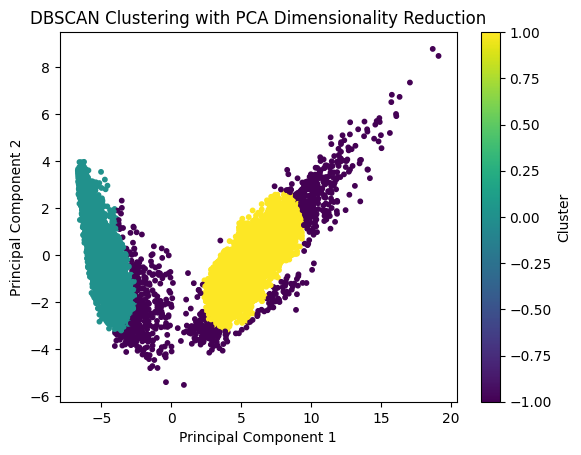

In [81]:
# Apply DBSCAN with optimized parameters after dimensionality reduction
dbscan = DBSCAN(eps=1, min_samples=561)
dbscan_pca_labels = dbscan.fit_predict(principalDf)

plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=dbscan_pca_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering with PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [41]:
principalDf

,PC1,PC2
0,-16.380980,1.995083
1,-15.582173,1.182593
2,-15.423989,2.243166
3,-15.647807,3.762882
4,-15.842320,4.438897
...,...,...
10294,10.166057,-6.504222
10295,12.131154,-4.882446
10296,11.846853,-3.433565
10297,8.206686,-4.386488


In [49]:
print(principalDf.shape)

(10299, 2)


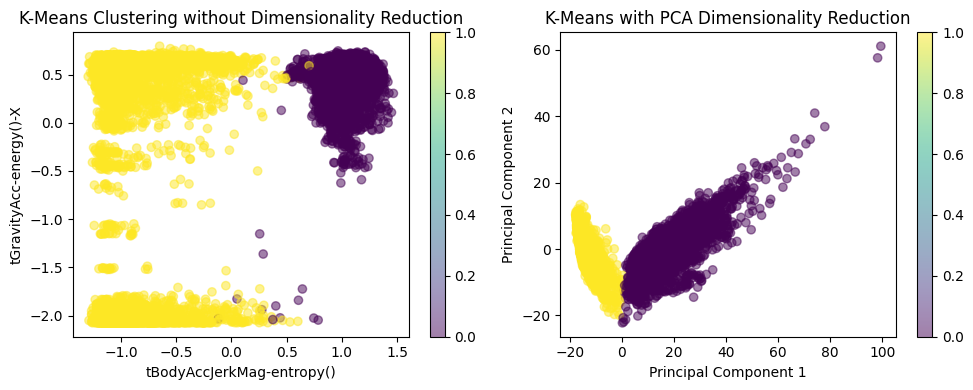

K-Means without Dimensionality Reduction:
Execution Time: 0.3461637496948242

K-Means with PCA Dimensionality Reduction:
Execution Time: 0.06310200691223145


In [65]:

# K-Means without dimensionality reduction
start_time = time.time()
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)
end_time = time.time()
kmeans_time = end_time - start_time

# K-Means with dimensionality reduction
start_time = time.time()
kmeans_pca = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(principalDf)
end_time = time.time()
kmeans_pca_time = end_time - start_time

# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 234], X_train_scaled[:, 56], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering without Dimensionality Reduction')
plt.xlabel('tBodyAccJerkMag-entropy()')
plt.ylabel('tGravityAcc-energy()-X')
plt.colorbar()


plt.subplot(1, 2, 2)
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=kmeans_pca_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means with PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

print("K-Means without Dimensionality Reduction:")
print("Execution Time:", kmeans_time)

print("\nK-Means with PCA Dimensionality Reduction:")
print("Execution Time:", kmeans_pca_time)

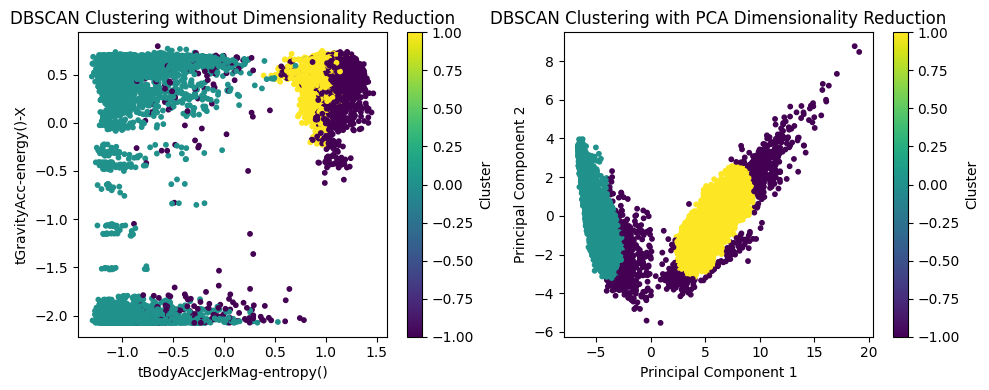

DBSCAN without Dimensionality Reduction:
Execution Time: 3.9310734272003174

DBSCAN with PCA Dimensionality Reduction:
Execution Time: 0.25217294692993164


In [80]:
# Measure execution time
start_time = time.time()

# Apply DBSCAN with optimized parameters
dbscan = DBSCAN(eps=17, min_samples=561)
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Measure execution time
dbscan_execution_time = time.time() - start_time

# Measure execution time
start_time = time.time()

# Apply DBSCAN with optimized parameters after dimensionality reduction
dbscan = DBSCAN(eps=1, min_samples=561)
dbscan_pca_labels = dbscan.fit_predict(principalDf)

# Measure execution time
dbscan_execution_pca_time = time.time() - start_time


# Visualizing DBSCAN clustering
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 234], X_train_scaled[:, 56], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering without Dimensionality Reduction')
plt.xlabel('tBodyAccJerkMag-entropy()')
plt.ylabel('tGravityAcc-energy()-X')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=dbscan_pca_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering with PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

print("DBSCAN without Dimensionality Reduction:")
print("Execution Time:", dbscan_execution_time)

print("\nDBSCAN with PCA Dimensionality Reduction:")
print("Execution Time:", dbscan_execution_pca_time)
